# Basic Model

Logistic Regression

In [55]:
import pandas as pd

filepath_dict = {'yelp' : '../datasets/sentiment_analysis/yelp_labelled.txt',
                 'amazon': '../datasets/sentiment_analysis/amazon_cells_labelled.txt',
                 'imdb' : '../datasets/sentiment_analysis/imdb_labelled.txt'}
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names = ['sentence', 'label'], sep = '\t')
    df['source'] = source
    df_list.append(df)
    

df = pd.concat(df_list)
print(df.iloc[0])
df

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
5,Now I am getting angry and I want my damn pho.,0,yelp
6,Honeslty it didn't taste THAT fresh.),0,yelp
7,The potatoes were like rubber and you could te...,0,yelp
8,The fries were great too.,1,yelp
9,A great touch.,1,yelp


In [56]:
sentences = ['John likes ice cream', 'John hates chocolate']

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 0, lowercase = False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [58]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [59]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.25, random_state = 1000)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
x_train = vectorizer.transform(sentences_train)
x_test = vectorizer.transform(sentences_test)
x_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [61]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)
print ('Accuracy:  ', score)

Accuracy:   0.796


In [62]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.25, random_state = 1000)
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    x_train = vectorizer.transform(sentences_train)
    x_test = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    print('Accuracy for {} data is: {:.4f}'.format(source, score))

Accuracy for yelp data is: 0.7960
Accuracy for amazon data is: 0.7960
Accuracy for imdb data is: 0.7487


# Deep Learning model using keras

In [63]:
from keras.models import Sequential
from keras import layers

input_dims = x_train.shape[1]

model = Sequential()
model.add(layers.Dense(10, input_dim = input_dims, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [64]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(x_train, y_train, epochs = 100, verbose = 1, validation_data = (x_test, y_test), batch_size = 10)

Train on 561 samples, validate on 187 samples
Epoch 1/100
561/561 [==============================] - 1s 2ms/step - loss: 0.6887 - acc: 0.5989 - val_loss: 0.6745 - val_acc: 0.6364
Epoch 2/100
561/561 [==============================] - 0s 774us/step - loss: 0.6321 - acc: 0.8075 - val_loss: 0.6679 - val_acc: 0.7112
Epoch 3/100
561/561 [==============================] - 0s 785us/step - loss: 0.5578 - acc: 0.8948 - val_loss: 0.6174 - val_acc: 0.7487
Epoch 4/100
561/561 [==============================] - 0s 782us/step - loss: 0.4614 - acc: 0.9340 - val_loss: 0.5695 - val_acc: 0.7380
Epoch 5/100
561/561 [==============================] - 0s 773us/step - loss: 0.3686 - acc: 0.9661 - val_loss: 0.5856 - val_acc: 0.7540
Epoch 6/100
561/561 [==============================] - 0s 811us/step - loss: 0.2961 - acc: 0.9733 - val_loss: 0.5232 - val_acc: 0.7647
Epoch 7/100
561/561 [==============================] - 0s 801us/step - loss: 0.2392 - acc: 0.9804 - val_loss: 0.5592 - val_acc: 0.7594
Epoch 8/100

561/561 [==============================] - 0s 746us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.7690 - val_acc: 0.7754
Epoch 62/100
561/561 [==============================] - 0s 815us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.7731 - val_acc: 0.7754
Epoch 63/100
561/561 [==============================] - 0s 764us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.7770 - val_acc: 0.7754
Epoch 64/100
561/561 [==============================] - 0s 767us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.7824 - val_acc: 0.7754
Epoch 65/100
561/561 [==============================] - 0s 825us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.7865 - val_acc: 0.7754
Epoch 66/100
561/561 [==============================] - 0s 766us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.7902 - val_acc: 0.7807
Epoch 67/100
561/561 [==============================] - 0s 740us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.7957 - val_acc: 0.7807
Epoch 68/100
561/561 [==============================] - 0s 75

In [66]:
loss, accuracy = model.evaluate(x_train, y_train, verbose = 0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print("Training Accuracy : {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Training Accuracy : 0.7807


In [67]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label = 'Training acc')
    plt.plot(x, val_acc, 'r', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label ='Training loss')
    plt.plot(x, val_loss, 'r', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

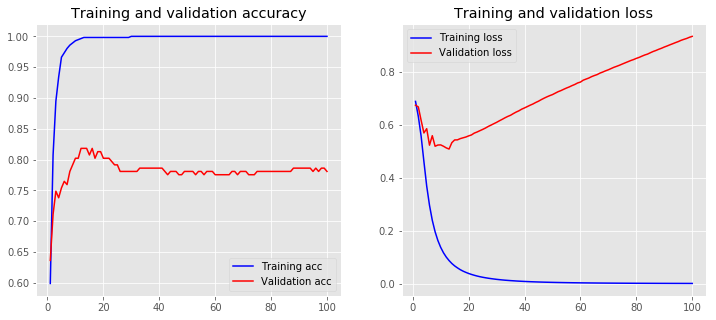

In [68]:
plot_history(history)

In [69]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(sentences_train)

x_train = tokenizer.texts_to_sequences(sentences_train)
x_test = tokenizer.texts_to_sequences(sentences_test)

vocab_Size = len(tokenizer.word_index) + 1

print(sentences_train[2])
print(x_train[2])

I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [70]:
for word in ['the', 'all']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 27


In [71]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

x_train = pad_sequences(x_train, padding = 'post', maxlen = maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen = maxlen)

print(x_train[0, :])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


# Keras Embedding Layer

In [72]:
from keras.models import Sequential
from keras import layers

embedding_dims = 50
model = Sequential()
model.add(layers.Embedding(input_dim = vocab_Size,
                          output_dim = embedding_dims,
                          input_length = maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_2 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


Train on 561 samples, validate on 187 samples
Epoch 1/20
561/561 [==============================] - 2s 3ms/step - loss: 0.6962 - acc: 0.5205 - val_loss: 0.7023 - val_acc: 0.4866
Epoch 2/20
561/561 [==============================] - 1s 2ms/step - loss: 0.6862 - acc: 0.5294 - val_loss: 0.6945 - val_acc: 0.4866
Epoch 3/20
561/561 [==============================] - 1s 2ms/step - loss: 0.6525 - acc: 0.5437 - val_loss: 0.6983 - val_acc: 0.4920
Epoch 4/20
561/561 [==============================] - 1s 2ms/step - loss: 0.5270 - acc: 0.7754 - val_loss: 0.6782 - val_acc: 0.5775
Epoch 5/20
561/561 [==============================] - 1s 2ms/step - loss: 0.2040 - acc: 0.9750 - val_loss: 0.6162 - val_acc: 0.7166
Epoch 6/20
561/561 [==============================] - 1s 2ms/step - loss: 0.0606 - acc: 0.9964 - val_loss: 0.6077 - val_acc: 0.6845
Epoch 7/20
561/561 [==============================] - 1s 2ms/step - loss: 0.0283 - acc: 0.9982 - val_loss: 0.6392 - val_acc: 0.7112
Epoch 8/20
561/561 [==========

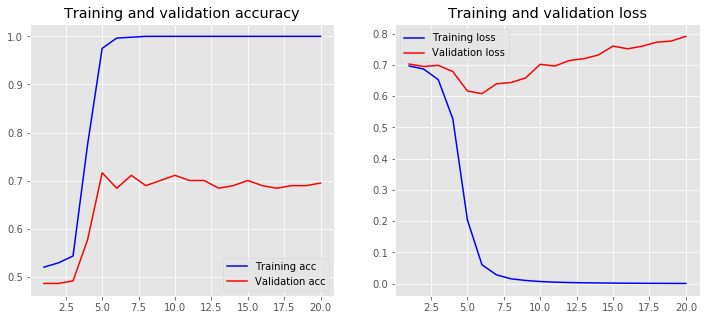

In [73]:
history = model.fit(x_train, y_train,epochs = 20, verbose = 1,
                   validation_data = (x_test, y_test),
                   batch_size = 10)
loss_accuracy = model.evaluate(x_train, y_train, verbose = False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose = False)
print('Testing Accuracy: {:.4f}'.format(accuracy))
plot_history(history)

In [77]:
from keras.models import Sequential
from keras import layers

embedding_dims = 50

model = Sequential()
model.add(layers.Embedding(input_dim = vocab_Size,
                          output_dim = embedding_dims,
                          input_length = maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', 
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


Training Accuracy : 1.0000
Testing Accuracy: 0.7754


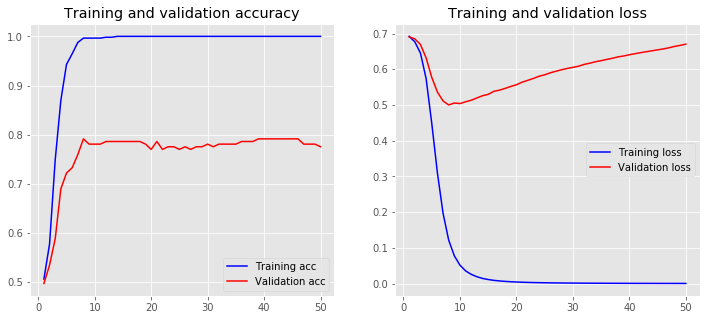

In [78]:
history = model.fit(x_train, y_train, epochs = 50, verbose = False, validation_data = (x_test, y_test), batch_size = 10)
loss, accuracy = model.evaluate(x_train, y_train, verbose = False)
print('Training Accuracy : {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose = False)
print('Testing Accuracy: {:.4f}'.format(accuracy))
plot_history(history)